In [1]:
import pandas as pd
import numpy as np

In [2]:
viirs_df = pd.read_csv("https://firms.modaps.eosdis.nasa.gov/data/active_fire/viirs/csv/VNP14IMGTDL_NRT_USA_contiguous_and_Hawaii_24h.csv")
viirs_df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,22.95622,-81.00756,306.3,0.46,0.64,2019-08-14,618,N,nominal,1.0NRT,285.4,1.2,N
1,21.81250,-72.29272,316.0,0.42,0.38,2019-08-14,618,N,nominal,1.0NRT,294.3,4.9,N
2,20.14683,-75.89905,317.9,0.40,0.45,2019-08-14,618,N,nominal,1.0NRT,290.9,1.4,N
3,18.60232,-70.97865,313.1,0.38,0.36,2019-08-14,618,N,nominal,1.0NRT,292.2,0.9,N
4,18.52915,-72.59291,308.9,0.41,0.37,2019-08-14,618,N,nominal,1.0NRT,293.8,1.1,N


In [12]:
viirs_df.bright_ti4.describe()

count    2751.000000
mean      319.023337
std        18.006169
min       208.000000
25%       304.400000
50%       312.100000
75%       333.800000
max       367.000000
Name: bright_ti4, dtype: float64

In [11]:
viirs_df.confidence.value_counts()

nominal    2618
low          91
high         42
Name: confidence, dtype: int64

In [23]:
viirs_df["confidence"] = viirs_df["confidence"].replace({"low": 0, "nominal": 1, "high": 2})
viirs_df.confidence.value_counts()

1    2618
0      91
2      42
Name: confidence, dtype: int64

In [24]:
viirs_df.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
confidence      int64
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

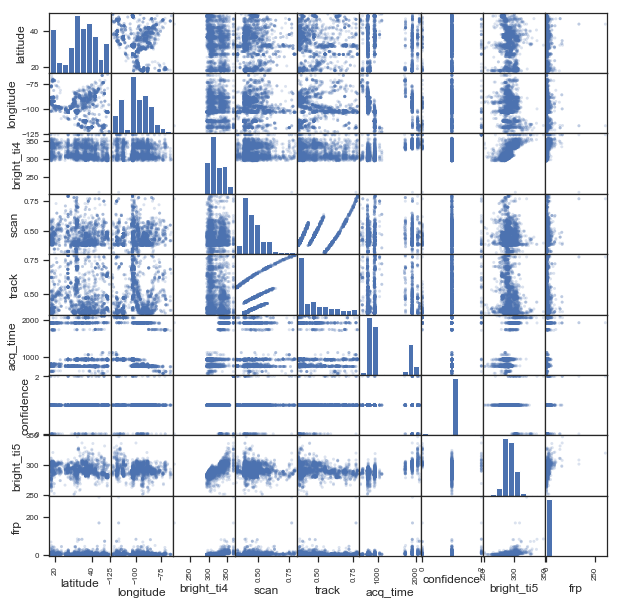

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(viirs_df, alpha=0.2, figsize=(10,10));

In [3]:
modis_df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/data/active_fire/c6/csv/MODIS_C6_USA_contiguous_and_Hawaii_24h.csv')
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,17.599,-88.307,336.1,1.8,1.3,2019-08-14,430,T,100,6.0NRT,296.5,77.6,N
1,17.597,-88.324,320.3,1.8,1.3,2019-08-14,430,T,100,6.0NRT,295.8,32.3,N
2,18.038,-88.255,309.5,1.8,1.3,2019-08-14,430,T,76,6.0NRT,294.7,16.4,N
3,17.893,-92.492,321.7,1.0,1.0,2019-08-14,435,T,100,6.0NRT,286.4,19.7,N
4,17.835,-93.121,307.8,1.0,1.0,2019-08-14,435,T,68,6.0NRT,294.8,5.1,N


In [6]:
modis_df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,29.833430,-97.289718,322.953382,1.522669,1.186472,1475.658135,65.866545,298.319196,31.892870
std,8.435587,11.372038,15.038577,0.701462,0.220721,550.239064,21.353867,7.776136,50.879202
min,17.546000,-123.169000,300.600000,1.000000,1.000000,335.000000,0.000000,270.100000,2.800000
25%,21.015500,-103.247500,313.200000,1.000000,1.000000,935.000000,53.000000,293.800000,10.050000
50%,30.742000,-97.695000,319.500000,1.300000,1.100000,1725.000000,67.000000,297.700000,16.400000
75%,36.080500,-88.571500,330.250000,1.700000,1.300000,1900.000000,80.000000,303.900000,32.150000
max,49.176000,-65.313000,393.200000,4.700000,2.000000,2135.000000,100.000000,321.400000,535.100000


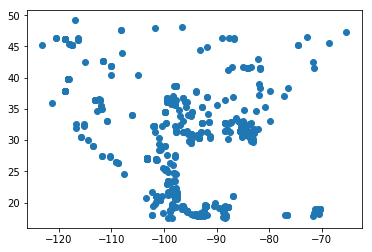

In [10]:
import matplotlib.pyplot as plt

plt.scatter(modis_df["longitude"], modis_df["latitude"])
plt.show()